In [53]:
!wget http://t.dripemail2.com/c/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiMzY2MDc5MDY4MSIsInVybCI6Imh0dHA6Ly9weWltZy5jby9tYnZkaz9fX3M9aGhvaXpqZ2dlcXpwM2N3Z3FpanYifQ


Redirecting output to ‘wget-log.1’.


In [54]:
!unzip eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiMzY2MDc5MDY4MSIsInVybCI6Imh0dHA6Ly9weWltZy5jby9tYnZkaz9fX3M9aGhvaXpqZ2dlcXpwM2N3Z3FpanYifQ

Archive:  eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiMzY2MDc5MDY4MSIsInVybCI6Imh0dHA6Ly9weWltZy5jby9tYnZkaz9fX3M9aGhvaXpqZ2dlcXpwM2N3Z3FpanYifQ
replace keras-tutorial/animals/cats/cats_00001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import matplotlib 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.optimizers import SGD
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import glob
%matplotlib inline 

In [0]:
data_path = '/content/keras-tutorial/animals/*'

## Loading the dataset
<ul>
    <li>Load images into <code>data</code></li>
    <li>Load labels into <code>labels</code></li>
</ul>

In [58]:
data = []
labels = []

paths = glob.glob(data_path)
image_paths = []

random.seed(42)

for path in paths:
    sub_paths = glob.glob(os.path.sep.join([path, '*']))
    for i in sub_paths:
        image_paths.append(i)

print(os.path.exists(data_path))
random.shuffle(image_paths)

for path in image_paths:
    image = cv2.imread(path)
    image = cv2.resize(image, (64, 64)).flatten()
    data.append(image)
    
    label = path.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data, dtype = np.float64) / 255
labels = np.array(labels)

False


In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape = (4096 * 3,), activation = 'sigmoid'))
model.add(Dense(512, activation = 'sigmoid'))
model.add(Dense(len(lb.classes_), activation = 'softmax'))

In [0]:
INIT_LR = 0.01
epochs = 100

opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [63]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = epochs, batch_size = 32)

Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 1s 660us/step - loss: 1.0816 - acc: 0.4031 - val_loss: 1.1071 - val_acc: 0.3147
Epoch 2/100
2250/2250 [==============================] - 1s 431us/step - loss: 1.0348 - acc: 0.4711 - val_loss: 1.0232 - val_acc: 0.5013
Epoch 3/100
2250/2250 [==============================] - 1s 433us/step - loss: 0.9965 - acc: 0.5067 - val_loss: 0.9959 - val_acc: 0.5013
Epoch 4/100
2250/2250 [==============================] - 1s 430us/step - loss: 0.9692 - acc: 0.5196 - val_loss: 0.9859 - val_acc: 0.4707
Epoch 5/100
2250/2250 [==============================] - 1s 439us/step - loss: 0.9371 - acc: 0.5444 - val_loss: 0.9788 - val_acc: 0.4800
Epoch 6/100
2250/2250 [==============================] - 1s 435us/step - loss: 0.9192 - acc: 0.5356 - val_loss: 1.0025 - val_acc: 0.4613
Epoch 7/100
2250/2250 [==============================] - 1s 433us/step - loss: 0.9025 - acc: 0.5453 - val_loss: 0.9794 - val_acc: 0

In [0]:
predictions = model.predict(testX, batch_size=32)

In [65]:
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1), target_names = lb.classes_))

             precision    recall  f1-score   support

       cats       0.63      0.20      0.31       236
       dogs       0.46      0.84      0.59       278
      panda       0.79      0.55      0.65       236

avg / total       0.62      0.55      0.52       750



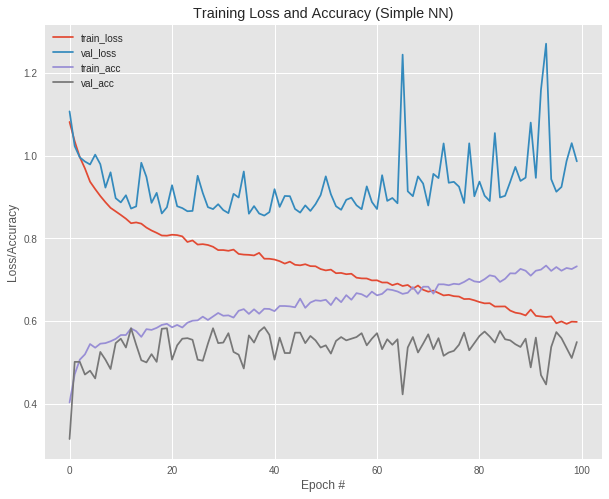

In [66]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize = (10, 8))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()